In [1]:
#MLB Data Science Assessment
#Submitted by Sudesh V Khillare

1)	Consider data set 1 (ds1.csv). The data set comprises features
(the Five xs) along with three sequences that may or may not be generated
from the features (3 ys).

a) Describe the data set in a few sentences.  E.g.   What are the
distributions of each feature?  Summary statistics?

b) Try to come up with a predictive model, e.g.  y = f(x_1 , … , x_n)
for each y sequence.   Describe your model and how you came up with
them.   What (if any) are the predictive variables?  How good would
you say each of your models is?



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score, accuracy_score

In [3]:
df1=pd.read_csv('D:/MLB/ds1.csv')
df1.head()

Unnamed: 0        x1        x2        x3        x5        x6         ya  \
0           1  2.642583 -1.715220  1.909334  0.027139 -3.447187  13.630850   
1           2  4.588761 -2.507543  4.239107  1.704150 -2.782809   7.834582   
2           3  7.919796 -5.108415  3.039451  0.992815  5.551587  -5.107041   
3           4  2.616757 -2.124040  2.855570  0.990079  1.694697  19.015046   
4           5  3.300856 -5.159684  0.764544  0.143581  3.277496  -9.818862   

         yb        yc  
0  1.828765  0.008386  
1  2.162110  0.000008  
2  2.797083 -0.000005  
3  1.953887  0.038017  
4  1.922446  0.001178

In [5]:
#To check if there is any missing data points
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
Unnamed: 0    100000 non-null int64
x1            100000 non-null float64
x2            100000 non-null float64
x3            100000 non-null float64
x5            100000 non-null float64
x6            100000 non-null float64
ya            100000 non-null float64
yb            100000 non-null float64
yc            100000 non-null float64
dtypes: float64(8), int64(1)
memory usage: 6.9 MB


In [4]:
#Descriptive Statistics for each variable: Mean, Median, Mode, Quantiles, Max and Min values for all variables.
df1.describe()

Unnamed: 0             x1             x2             x3  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    50000.500000       5.011059      -3.005565       2.500593   
std     28867.657797       2.873568       2.000799       1.752906   
min         1.000000       0.000015     -12.498524      -3.489212   
25%     25000.750000       2.536309      -4.353844       1.189920   
50%     50000.500000       5.022191      -3.002649       2.503764   
75%     75000.250000       7.486275      -1.649283       3.802236   
max    100000.000000       9.999887       6.089820       8.679097   

                  x5             x6             ya             yb  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.999136       0.000647       3.827867       2.111854   
std         1.002006       4.663860      18.438514       0.769306   
min         0.000003     -13.885453     -64.021995      -0.523672   
25%         0.285629      -2.611943      -8.998020       1.580212   
50%         0.690903      -0.000611       2.666992       2.231057   
75%         1.386862       2.621841      15.579687       2.733318   
max        15.102966      13.924740     107.713997       3.841363   

                 yc  
count  1.000000e+05  
mean   1.022765e-04  
std    3.121215e-02  
min   -5.433613e-01  
25%   -2.423158e-03  
50%   -5.670000e-10  
75%    2.476745e-03  
max    8.183882e-01

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018400AA5048>,
      dtype=object)

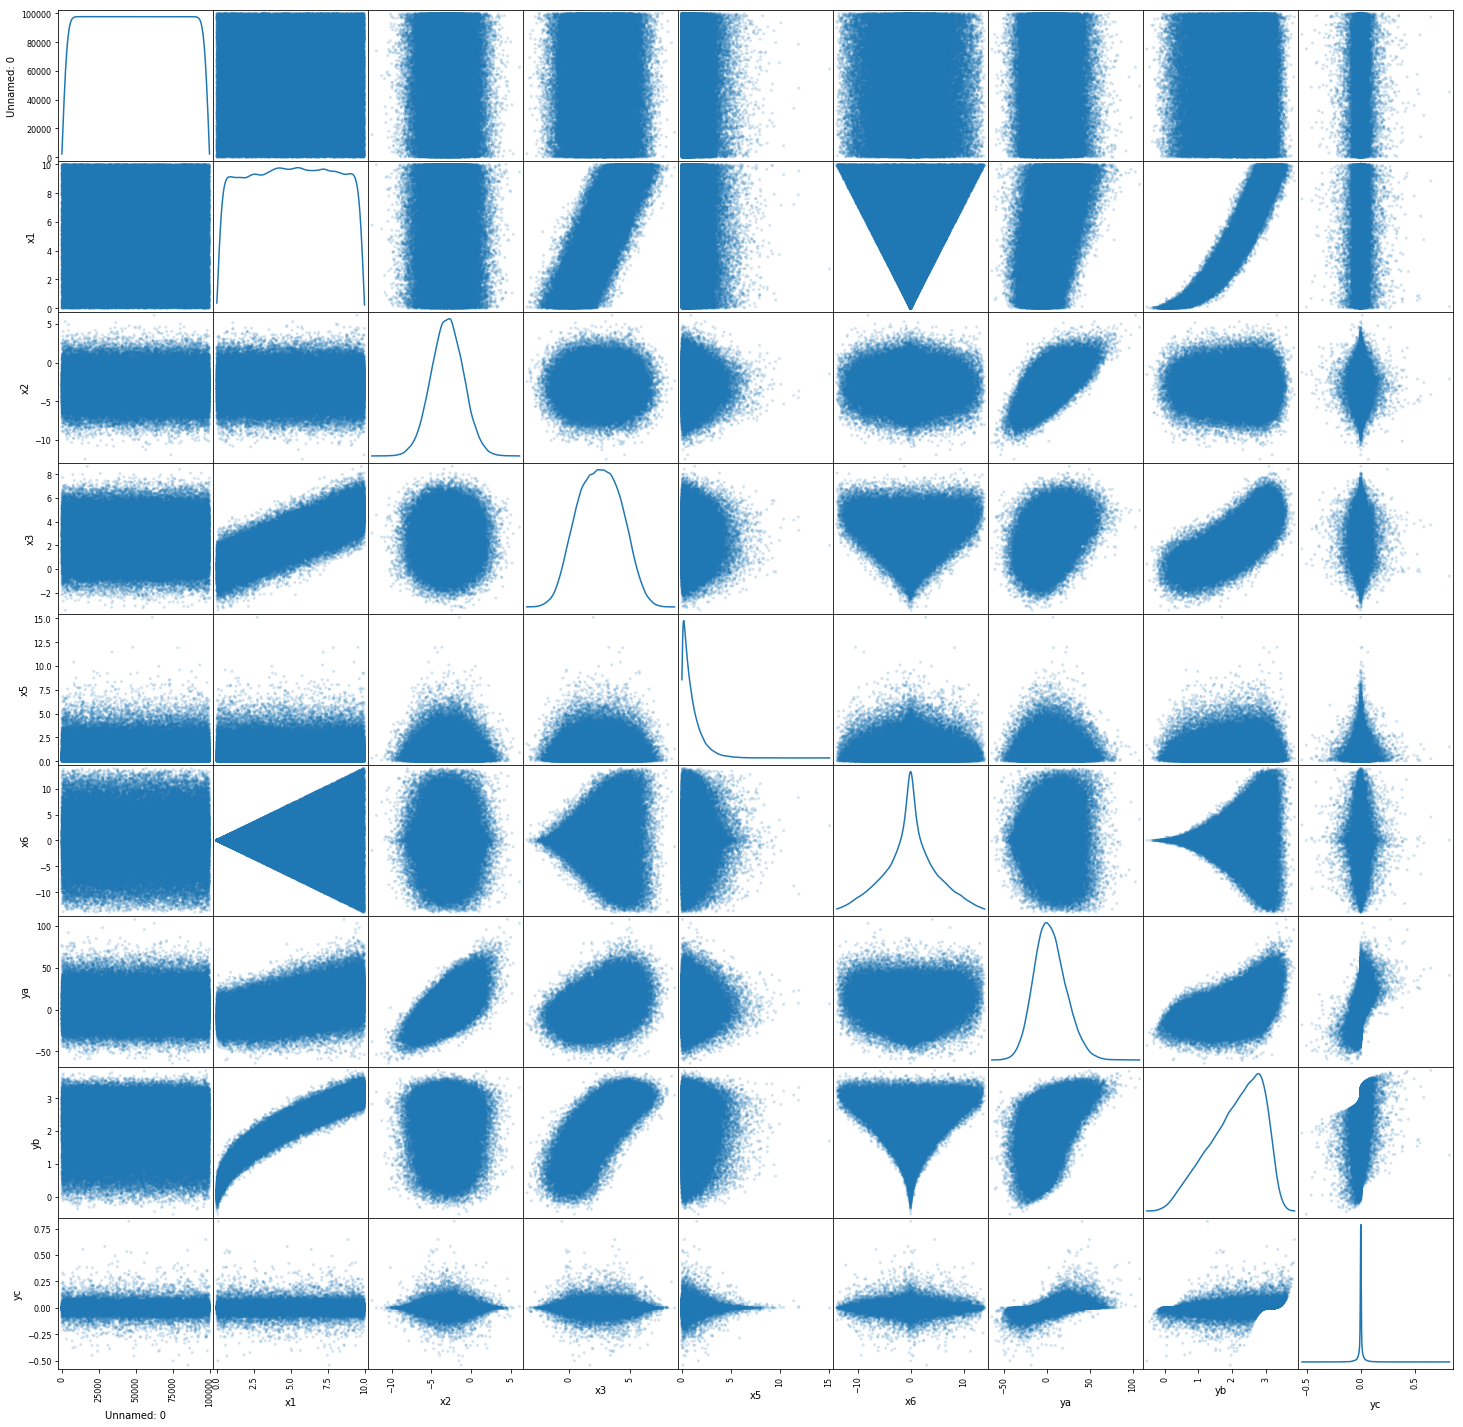

In [5]:
#Scatter Plot: At diagonal elements we can confirm the data distribution
from pandas.plotting import scatter_matrix
scatter_matrix(df1, alpha=0.2, figsize=(25, 25), diagonal='kde')

Data Discription:
1. From info command we can get the datatypes for each variable from dataset, total entries and not null entries for each column. From here we can confirm that there is no missing value in the dataset.
2. From describe command we can get the descriptive statistics like what is Mean, Standard Deviation, Quantile Values, Max and Min values for each variable.
3. From diagonal elements of above scatter plot we can identify the distribution of each element. 


ya            1.000000
x2            0.675648
yb            0.572271
x1            0.465431
yc            0.421504
x3            0.411148
x5            0.002463
x6            0.001964
Unnamed: 0   -0.001960
Name: ya, dtype: float64


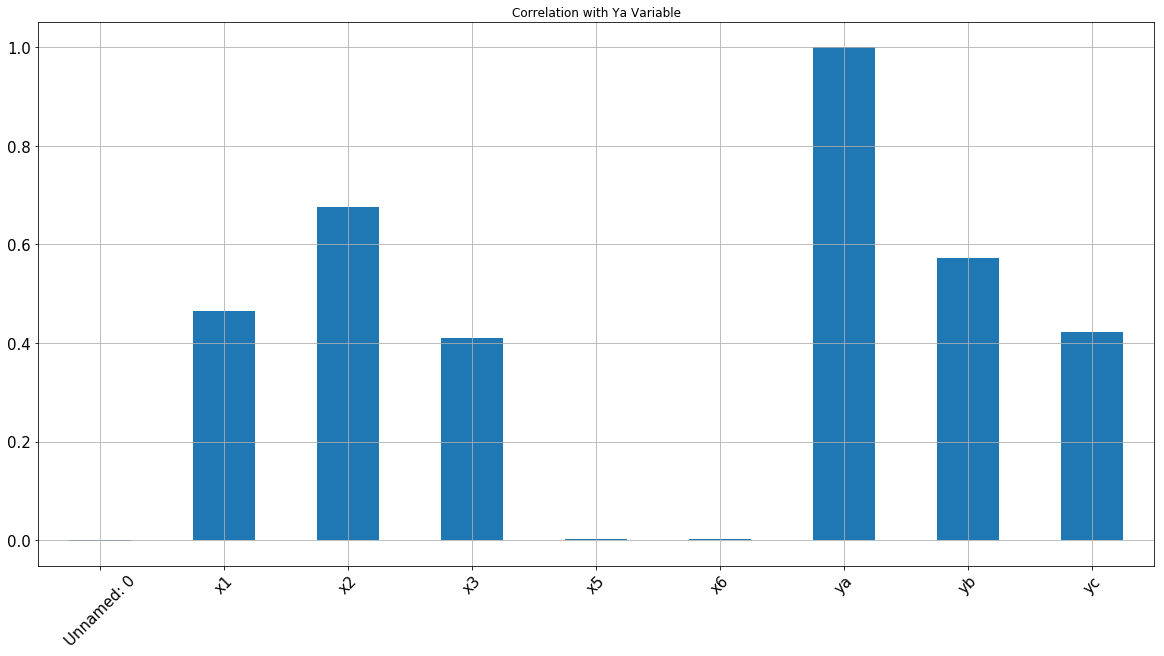

In [6]:
#Correlation for first target variable Ya
Correlation=df1.corr()
Value_ya=Correlation["ya"].sort_values(ascending=False )
Value_ya
print(Value_ya)

df1.corrwith(df1.ya).plot.bar(
        figsize = (20, 10), title = "Correlation with Ya Variable", fontsize = 15,
        rot = 45, grid = True)

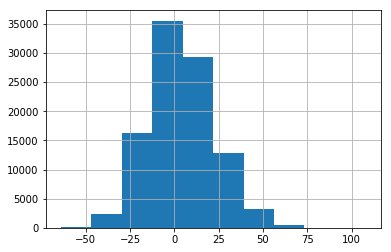

In [7]:
#Distribution of Target Variable Ya
df1['ya'].hist()

yb            1.000000
x1            0.945973
x3            0.775455
ya            0.572271
yc            0.203275
x5            0.004666
x6            0.001163
Unnamed: 0   -0.000866
x2           -0.001495
Name: yb, dtype: float64


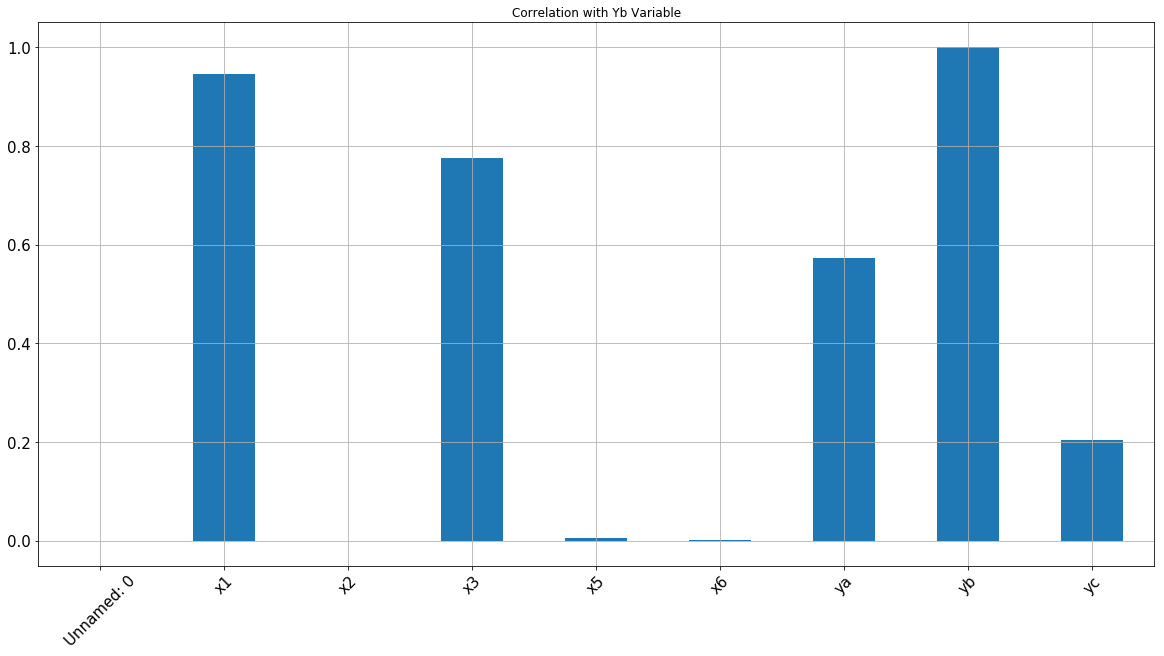

In [8]:
#Correlation for second target variable Yb
Value_yb=Correlation["yb"].sort_values(ascending=False )
Value_yb
print(Value_yb)

df1.corrwith(df1.yb).plot.bar(
        figsize = (20, 10), title = "Correlation with Yb Variable", fontsize = 15,
        rot = 45, grid = True)

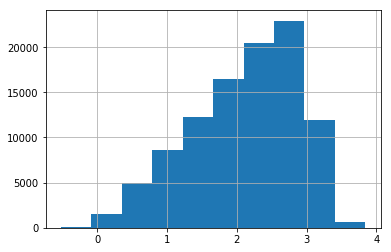

In [9]:
#Distribution of Target Variable Yb
df1['yb'].hist()

yc            1.000000
ya            0.421504
yb            0.203275
x5            0.002866
x1            0.002746
x2            0.000495
x6           -0.000150
x3           -0.001078
Unnamed: 0   -0.004131
Name: yc, dtype: float64


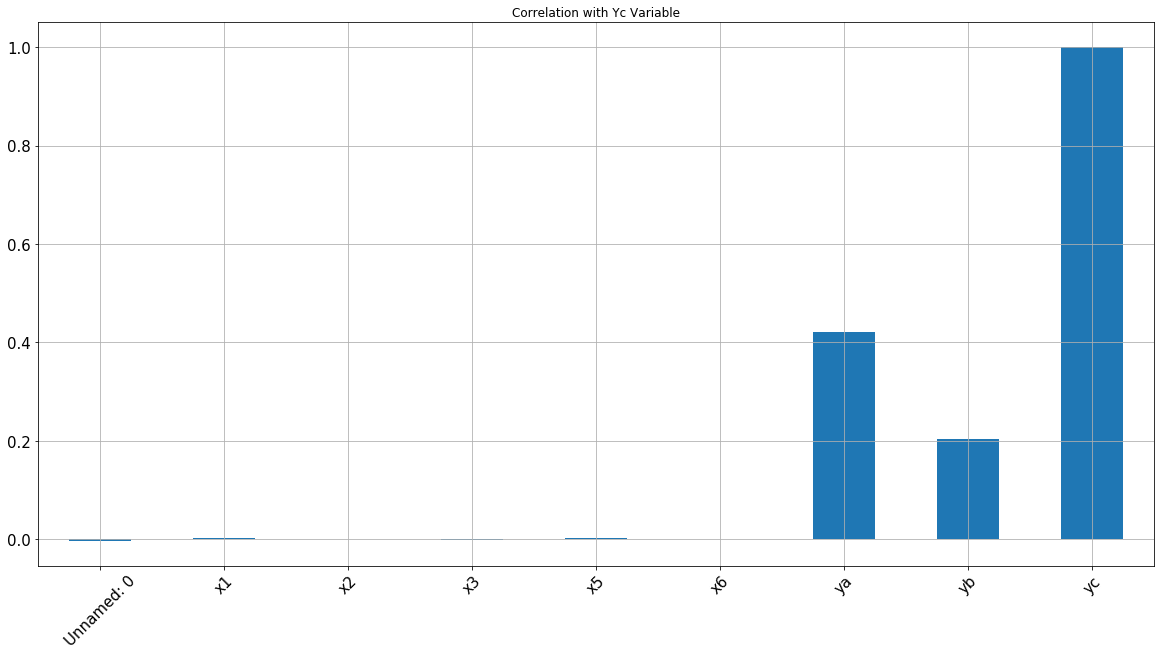

In [10]:
#Correlation for second target variable Yc
Value_yc=Correlation["yc"].sort_values(ascending=False )
Value_yc
print(Value_yc)

df1.corrwith(df1.yc).plot.bar(
        figsize = (20, 10), title = "Correlation with Yc Variable", fontsize = 15,
        rot = 45, grid = True)

From above correlation values and plot we can confirm that variable Yc is not correlated with any of the X variables. Thus we can confimr it is not made by combining X variables hence we can't predict Yc from this given dataset.

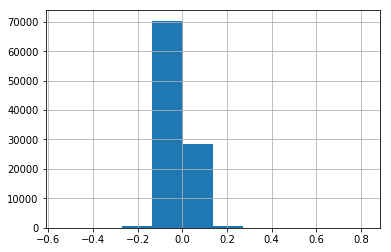

In [11]:
#Distribution of Target Variable Yc
df1['yc'].hist()

# Model Building

## 1. Defining Model Function

As we need to predict two dependent variables, Ya and Yb, here I have designed functions for each model. So we can call the functions from passing the Train and Test data to get the prediction for both target variables. Returning predicted values as function output.

In [12]:
def Linear_Regression_Model(X_Train,Y_Train,X_Test):
    #Linear Regression
    from sklearn.linear_model import LinearRegression
    Lin_Reg=LinearRegression()
    Lin_Reg.fit(X_Train,Y_Train)
    Y_Pred_Lin_Reg=Lin_Reg.predict(X_Test)
    return Y_Pred_Lin_Reg
    

In [13]:
def Random_Forest_Regression_Model(X_Train,Y_Train,X_Test):
    #Random Forest Regressor
    from sklearn.ensemble import RandomForestRegressor
    Rand_For=RandomForestRegressor()
    Rand_For.fit(X_Train,Y_Train)
    Y_Pred_Rand_For=Rand_For.predict(X_Test)
    return Y_Pred_Rand_For
    

In [14]:
def Support_Vector_Regression_Model(X_Train,Y_Train,X_Test):
    #Support Vector Regression Model
    from sklearn.svm import SVR
    SVR=SVR()
    SVR.fit(X_Train,Y_Train)
    Y_Pred_SVR=SVR.predict(X_Test)
    return Y_Pred_SVR

In [15]:
def Gradient_Boosting_Regression_Model(X_Train,Y_Train,X_Test):
    #Gradient Boosting Regression Model
    from sklearn.ensemble import GradientBoostingRegressor
    Grad_Boost=GradientBoostingRegressor()
    Grad_Boost.fit(X_Train,Y_Train)
    Y_Pred_Grad_Boost=Grad_Boost.predict(X_Test)
    return Y_Pred_Grad_Boost

## 2. Prediction of Ya 

In [16]:
from sklearn.model_selection import train_test_split
X=df1[['x1','x2','x3']]
Y=df1['ya']
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
#Linear Regression
#Calling function defined in previous section
Y_Pred_Lin_Reg_Ya=Linear_Regression_Model(X_Train,Y_Train,X_Test)

#Model Evaluation
RMSE_Lin_Reg_Ya = sqrt(mean_squared_error(Y_Test,Y_Pred_Lin_Reg_Ya))
print('Root Mean Squared Error for Linear Regression is: ',RMSE_Lin_Reg_Ya)

MAE_Lin_Reg_Ya = mean_absolute_error(Y_Test,Y_Pred_Lin_Reg_Ya)
print('Mean Absolute Error for Linear Regression is: ',MAE_Lin_Reg_Ya)

R_Sqared_Lin_Reg_Ya=r2_score(Y_Test,Y_Pred_Lin_Reg_Ya)*100
print(R_Sqared_Lin_Reg_Ya,'% variance in the data can be explained by this Linear Regression Model')

Root Mean Squared Error for Linear Regression is:  10.482204354682647
Mean Absolute Error for Linear Regression is:  8.339185421817863
67.73965079533004 % variance in the data can be explained by this Linear Regression Model


In [18]:
#Random Forest Regression
#Calling function defined in previous section
Y_Pred_Rand_For_Ya=Random_Forest_Regression_Model(X_Train,Y_Train,X_Test)

#Model Evaluation
RMSE_Rand_For_Ya = sqrt(mean_squared_error(Y_Test,Y_Pred_Rand_For_Ya))
print('Root Mean Squared Error for Random Forest Regression is: ',RMSE_Rand_For_Ya)

MAE_Rand_For_Ya = mean_absolute_error(Y_Test,Y_Pred_Rand_For_Ya)
print('Mean Absolute Error for Random Forest Regression is: ',MAE_Rand_For_Ya)

R_Sqared_Rand_For_Ya=r2_score(Y_Test,Y_Pred_Rand_For_Ya)*100
print(R_Sqared_Rand_For_Ya,'% variance in the data can be explained by this Random Forest Regression Model')

Root Mean Squared Error for Random Forest Regression is:  10.903210345105036
Mean Absolute Error for Random Forest Regression is:  8.696991109340932
65.09620888315797 % variance in the data can be explained by this Random Forest Regression Model


In [19]:
#Support Vector Regression
#Calling function defined in previous section
Y_Pred_SVR_Ya=Support_Vector_Regression_Model(X_Train,Y_Train,X_Test)

#Model Evaluation
RMSE_SVR_Ya = sqrt(mean_squared_error(Y_Test,Y_Pred_SVR_Ya))
print('Root Mean Squared Error for Support Vector Regression is: ',RMSE_SVR_Ya)

MAE_SVR_Ya = mean_absolute_error(Y_Test,Y_Pred_SVR_Ya)
print('Mean Absolute Error for Support Vector Regression is: ',MAE_SVR_Ya)

R_Sqared_SVR_Ya=r2_score(Y_Test,Y_Pred_SVR_Ya)*100
print(R_Sqared_SVR_Ya,'% variance in the data can be explained by this Support Vector Regression Model')

Root Mean Squared Error for Support Vector Regression is:  10.141533235848348
Mean Absolute Error for Support Vector Regression is:  8.05019285414103
69.8024953870378 % variance in the data can be explained by this Support Vector Regression Model


In [20]:
#Gradient Boosting Regression
#Calling function defined in previous section
Y_Pred_Grad_Boost_Ya=Gradient_Boosting_Regression_Model(X_Train,Y_Train,X_Test)

#Model Evaluation
RMSE_Grad_Boost_Ya = sqrt(mean_squared_error(Y_Test,Y_Pred_Grad_Boost_Ya))
print('Root Mean Squared Error for Gradint Boosting Regression is: ',RMSE_Rand_For_Ya)

MAE_Grad_Boost_Ya = mean_absolute_error(Y_Test,Y_Pred_Grad_Boost_Ya)
print('Mean Absolute Error for Gradint Boosting Regression is: ',MAE_Rand_For_Ya)

R_Sqared_Grad_Boost_Ya=r2_score(Y_Test,Y_Pred_Grad_Boost_Ya)*100
print(R_Sqared_Grad_Boost_Ya,'% variance in the data can be explained by this Gradint Boosting Regression Model')

Root Mean Squared Error for Gradint Boosting Regression is:  10.903210345105036
Mean Absolute Error for Gradint Boosting Regression is:  8.696991109340932
70.46376752462669 % variance in the data can be explained by this Gradint Boosting Regression Model


In [21]:
#Experimental Combined Approach: All model scores have given weightage as per their R Squared Value.
Combined_Score=(Y_Pred_SVR_Ya*R_Sqared_SVR_Ya)+(R_Sqared_Rand_For_Ya*Y_Pred_Rand_For_Ya)+(Y_Pred_Lin_Reg_Ya*R_Sqared_Lin_Reg_Ya)+(Y_Pred_Grad_Boost_Ya*R_Sqared_Grad_Boost_Ya)

#Normalizating with respect to R squared value for each score
Combined_Score=Combined_Score/(R_Sqared_SVR_Ya+R_Sqared_Rand_For_Ya+R_Sqared_Lin_Reg_Ya+R_Sqared_Grad_Boost_Ya)

#Model Evaluation
Y_Pred_Combined=Combined_Score
RMSE_Combined_Ya = sqrt(mean_squared_error(Y_Test,Y_Pred_Combined))
print('Root Mean Squared Error for Combined Regression is: ',RMSE_Combined_Ya)

MAE_Combined_Ya = mean_absolute_error(Y_Test,Y_Pred_Combined)
print('Mean Absolute Error for Combined Regression is: ',MAE_Combined_Ya)

R_Sqared_Combined_Ya=r2_score(Y_Test,Y_Pred_Combined)*100
print(R_Sqared_Combined_Ya,'% variance in the data can be explained by Combined Regression Model')

Root Mean Squared Error for Combined Regression is:  10.099530895819095
Mean Absolute Error for Combined Regression is:  8.043192035274306
70.05211036831479 % variance in the data can be explained by Combined Regression Model


In [22]:
from sklearn.linear_model import Ridge
Ridge_Reg = Ridge(alpha=0.01)
Ridge_Reg.fit(X_Train,Y_Train)
Ridge_train_score = Ridge_Reg.score(X_Train,Y_Train)
print('Regularized Score on Training Data via Ridge Regression is:',Ridge_train_score)
Ridge_test_score = Ridge_Reg.score(X_Test, Y_Test)
print('Regularized Score on Testing Data via Ridge Regression is:',Ridge_test_score)

Regularized Score on Training Data via Ridge Regression is: 0.6767638293442475
Regularized Score on Testing Data via Ridge Regression is: 0.6773965078339342


## 3. Predictions of Yb

In [23]:
from sklearn.model_selection import train_test_split
X_Yb=df1[['x1','x3']]
Y_Yb=df1['yb']
X_Train_Yb, X_Test_Yb, Y_Train_Yb, Y_Test_Yb = train_test_split(X_Yb, Y_Yb, test_size=0.2, random_state=42)

In [24]:
#Linear Regression
#Calling function defined in previous section
Y_Pred_Lin_Reg_Yb=Linear_Regression_Model(X_Train_Yb,Y_Train_Yb,X_Test_Yb)

#Model Evaluation
RMSE_Lin_Reg_Yb = sqrt(mean_squared_error(Y_Test_Yb,Y_Pred_Lin_Reg_Yb))
print('Root Mean Squared Error for Linear Regression is: ',RMSE_Lin_Reg_Yb)

MAE_Lin_Reg_Yb = mean_absolute_error(Y_Test_Yb,Y_Pred_Lin_Reg_Yb)
print('Mean Absolute Error for Linear Regression is: ',MAE_Lin_Reg_Yb)

R_Sqared_Lin_Reg_Yb=r2_score(Y_Test_Yb,Y_Pred_Lin_Reg_Yb)*100
print(R_Sqared_Lin_Reg_Yb,'% variance in the data can be explained by this Linear Regression Model')

Root Mean Squared Error for Linear Regression is:  0.2500995570873785
Mean Absolute Error for Linear Regression is:  0.1974709265278046
89.53001752872586 % variance in the data can be explained by this Linear Regression Model


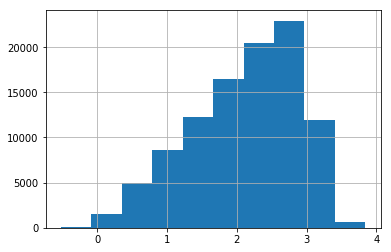

In [25]:
df1['yb'].hist()

From above histogram, we can confirm that target variable is not normally distributed. Thus taking polynomial transformation to enhance the accuracy.

In [26]:
5

In [27]:
# Now Running Linear Regression again with transformed data
#Calling function defined in previous section
Y_Pred_Lin_Reg_Yb=Linear_Regression_Model(X_Train_Yb,Y_Train_Yb,X_Test_Yb)

#Model Evaluation
RMSE_Lin_Reg_Yb = sqrt(mean_squared_error(Y_Test_Yb,Y_Pred_Lin_Reg_Yb))
print('Root Mean Squared Error for Transformed Linear Regression is: ',RMSE_Lin_Reg_Yb)

MAE_Lin_Reg_Yb = mean_absolute_error(Y_Test_Yb,Y_Pred_Lin_Reg_Yb)
print('Mean Absolute Error for Transformed Linear Regression is: ',MAE_Lin_Reg_Yb)

R_Sqared_Lin_Reg_Yb=r2_score(Y_Test_Yb,Y_Pred_Lin_Reg_Yb)*100
print(R_Sqared_Lin_Reg_Yb,'% variance in the data can be explained by this Transformed Linear Regression Model')

Root Mean Squared Error for Transformed Linear Regression is:  0.2098102830465901
Mean Absolute Error for Transformed Linear Regression is:  0.16699235539206098
92.63159228397073 % variance in the data can be explained by this Transformed Linear Regression Model


This change in result is due to implementation of polynomial features. It tries to fit data point with additional efforts. Now continuing this change in further models.

In [28]:
#Random Forest Regression
#Calling function defined in previous section
Y_Pred_Rand_For_Yb=Random_Forest_Regression_Model(X_Train_Yb,Y_Train_Yb,X_Test_Yb)

#Model Evaluation
RMSE_Rand_For_Yb = sqrt(mean_squared_error(Y_Test_Yb,Y_Pred_Rand_For_Yb))
print('Root Mean Squared Error for Random Forest Regression is: ',RMSE_Rand_For_Yb)

MAE_Rand_For_Yb = mean_absolute_error(Y_Test_Yb,Y_Pred_Rand_For_Yb)
print('Mean Absolute Error for Random Forest Regression is: ',MAE_Rand_For_Yb)

R_Sqared_Rand_For_Yb=r2_score(Y_Test_Yb,Y_Pred_Rand_For_Yb)*100
print(R_Sqared_Rand_For_Yb,'% variance in the data can be explained by Random Forest Regression Model')

Root Mean Squared Error for Random Forest Regression is:  0.22354642103325884
Mean Absolute Error for Random Forest Regression is:  0.17819397159967734
91.63520018798624 % variance in the data can be explained by Random Forest Regression Model


In [29]:
#Support Vector Regression
#Calling function defined in previous section
Y_Pred_SVR_Yb=Support_Vector_Regression_Model(X_Train_Yb,Y_Train_Yb,X_Test_Yb)

#Model Evaluation
RMSE_SVR_Yb = sqrt(mean_squared_error(Y_Test_Yb,Y_Pred_SVR_Yb))
print('Root Mean Squared Error for Support Vector Regression is: ',RMSE_SVR_Yb)

MAE_SVR_Yb = mean_absolute_error(Y_Test_Yb,Y_Pred_SVR_Yb)
print('Mean Absolute Error for Support Vector Regression is: ',MAE_SVR_Yb)

R_Sqared_SVR_Yb=r2_score(Y_Test_Yb,Y_Pred_SVR_Yb)*100
print(R_Sqared_SVR_Yb,'% variance in the data can be explained by Support Vector Regression Model')

Root Mean Squared Error for Support Vector Regression is:  0.20278878372214232
Mean Absolute Error for Support Vector Regression is:  0.1617051095402257
93.11652134233057 % variance in the data can be explained by Support Vector Regression Model


In [30]:
#Gradient Boosting Regression
#Calling function defined in previous section
Y_Pred_Grad_Boost_Yb=Gradient_Boosting_Regression_Model(X_Train_Yb,Y_Train_Yb,X_Test_Yb)

#Model Evaluation
RMSE_Grad_Boost_Yb = sqrt(mean_squared_error(Y_Test_Yb,Y_Pred_Grad_Boost_Yb))
print('Root Mean Squared Error for Gradint Boosting Regression is: ',RMSE_Rand_For_Yb)

MAE_Grad_Boost_Yb = mean_absolute_error(Y_Test_Yb,Y_Pred_Grad_Boost_Yb)
print('Mean Absolute Error for Gradint Boosting Regression is: ',MAE_Rand_For_Yb)

R_Sqared_Grad_Boost_Yb=r2_score(Y_Test_Yb,Y_Pred_Grad_Boost_Yb)*100
print(R_Sqared_Grad_Boost_Yb,'% variance in the data can be explained by this Gradint Boosting Regression Model')

Root Mean Squared Error for Gradint Boosting Regression is:  0.22354642103325884
Mean Absolute Error for Gradint Boosting Regression is:  0.17819397159967734
93.2732048667394 % variance in the data can be explained by this Gradint Boosting Regression Model


In [31]:
#Ridge Regularization
Ridge_Reg_Yb = Ridge(alpha=0.01)
Ridge_Reg_Yb.fit(X_Train_Yb,Y_Train_Yb)
Ridge_train_score_Yb = Ridge_Reg_Yb.score(X_Train_Yb,Y_Train_Yb)
print('Regularized Score on Training Data via Ridge Regression is:',Ridge_train_score_Yb)
Ridge_test_score_Yb = Ridge_Reg_Yb.score(X_Test_Yb, Y_Test_Yb)
print('Regularized Score on Testing Data via Ridge Regression is:',Ridge_test_score_Yb)

Regularized Score on Training Data via Ridge Regression is: 0.9252948630939748
Regularized Score on Testing Data via Ridge Regression is: 0.9263159226136403


1. After regularization also for both prediction, the R Squared values are similar. Thus, we can assure that model is not overfitting.
2. We can calculate the model performance by R squared value, Mean Squared Error and Mean Absolute Error.
3. Mean Squared Error and Mean Absolute Error should be minimum, that means model tried to predict all points well.
4. Value of R Square value should be high. Ideal value is 1. This shows how much variance in dataset can be explained by model. This way we can verify model performance.

2)	Consider data set 2 (ds2.csv).  The data asset comprises a set of
observations.
    
    a) Describe the data set in a few sentences.

    b) How would you visualize this data set?  Can you make an interesting
    visualization?

    c) Someone suggests that the observations are really from
    multiple different files and were accidentally joined into one larger
    data set.  Does anything about the data set suggest this?  If so, how
    many different sources/file do you think there are?

    d) Bonus points:  If you think there are more than one source in ds2,
    can you assign each observation to the right source (based on the
    number of sources you identified in 2c)?


In [32]:
df2=pd.read_csv('D:/MLB/ds2.csv')
df2.head()

Unnamed: 0         X1         X2         X3         X4        X5  \
0           1  23.778224  13.319974  15.565124  -3.713626  7.296793   
1           2  16.602950  23.311281  21.099052  -0.304154 -3.218990   
2           3  12.084683  19.710443   9.837102  -1.081918 -1.201942   
3           4  13.044534  10.749040   5.884407 -11.703525 -4.134358   
4           5   8.314115   6.748794   5.388535  -0.000290 -4.724787   

          X6         X7         X8         X9        X10  
0 -19.371013  -0.894130  -6.110282 -28.959316   2.851336  
1   2.357643  12.027277   7.070349  -5.762185 -23.050198  
2   9.738019  16.125920  19.119391 -15.582122 -12.292535  
3 -22.344666  -1.263349   0.493711 -15.305347   6.799087  
4 -16.346812   3.293600 -10.848273 -17.285491   6.034214

In [74]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
Unnamed: 0    2000 non-null int64
X1            2000 non-null float64
X2            2000 non-null float64
X3            2000 non-null float64
X4            2000 non-null float64
X5            2000 non-null float64
X6            2000 non-null float64
X7            2000 non-null float64
X8            2000 non-null float64
X9            2000 non-null float64
X10           2000 non-null float64
dtypes: float64(10), int64(1)
memory usage: 172.0 KB


In [33]:
#Descriptive Statistics for all variables
df2.describe()

Unnamed: 0           X1           X2           X3           X4  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean   1000.500000     8.677829    11.716801     9.252817    -2.679634   
std     577.494589    11.971827     6.655333     9.861443    10.625164   
min       1.000000   -25.824199    -8.497562   -23.666439   -29.429655   
25%     500.750000     0.231327     7.161564     2.648845   -10.652694   
50%    1000.500000    12.754335    11.896021    11.422441    -2.631318   
75%    1500.250000    17.364337    16.279210    16.503676     5.340314   
max    2000.000000    32.268570    32.909917    31.230550    26.422798   

                X5           X6           X7           X8           X9  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      2.774942     0.077631     8.200884     8.712878   -12.860135   
std       8.800553    15.375478    10.426023     9.881482     8.881026   
min     -22.033329   -35.264019   -21.428538   -16.811146   -36.065150   
25%      -4.098043   -14.003670    -0.812888     1.480706   -19.430697   
50%       2.484416     1.500838     8.532535     9.628064   -14.417786   
75%       9.660898    14.050512    17.138898    16.081044    -6.534142   
max      29.312010    31.727042    32.084297    36.847922    13.553705   

               X10  
count  2000.000000  
mean     -1.339360  
std      14.534143  
min     -36.468083  
25%     -13.216190  
50%      -2.094310  
75%      10.561797  
max      32.641789

Data Description:
1. In this dataframe all the variables are distributed towards both the sides of 0. Values are in the range of -40 to 30.
2. From info command we can get datatype for each variable, total number of rows and not null values. From here we can confirm there is no missing value in Data.
3. From Scatter Plot and Violin Plot from below sections we can confirm some of the variables are Normally Distributed and Some Variables are having Bimodal Distribution.
4. From output of describe command we got the Mean, Standard Deviation, Quantile Values, Max and Min values for each variable.

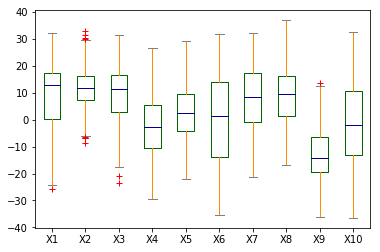

In [34]:
#Removing unnamed column form data as it is only serial count.
Data_Viz=df2[['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10']]

#Box Plot for all variables to understand the distribution and outliers
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange','medians': 'DarkBlue', 'caps': 'Gray'}
Data_Viz.plot.box(color=color, sym='r+')

Above Box Plot gives the idea about distribution for each variable. Also information about median and left or right skweness of data. Apart from this, all the red points beyond whisker shows the outlier from each variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001840C2C5E48>,
      dtype=object)

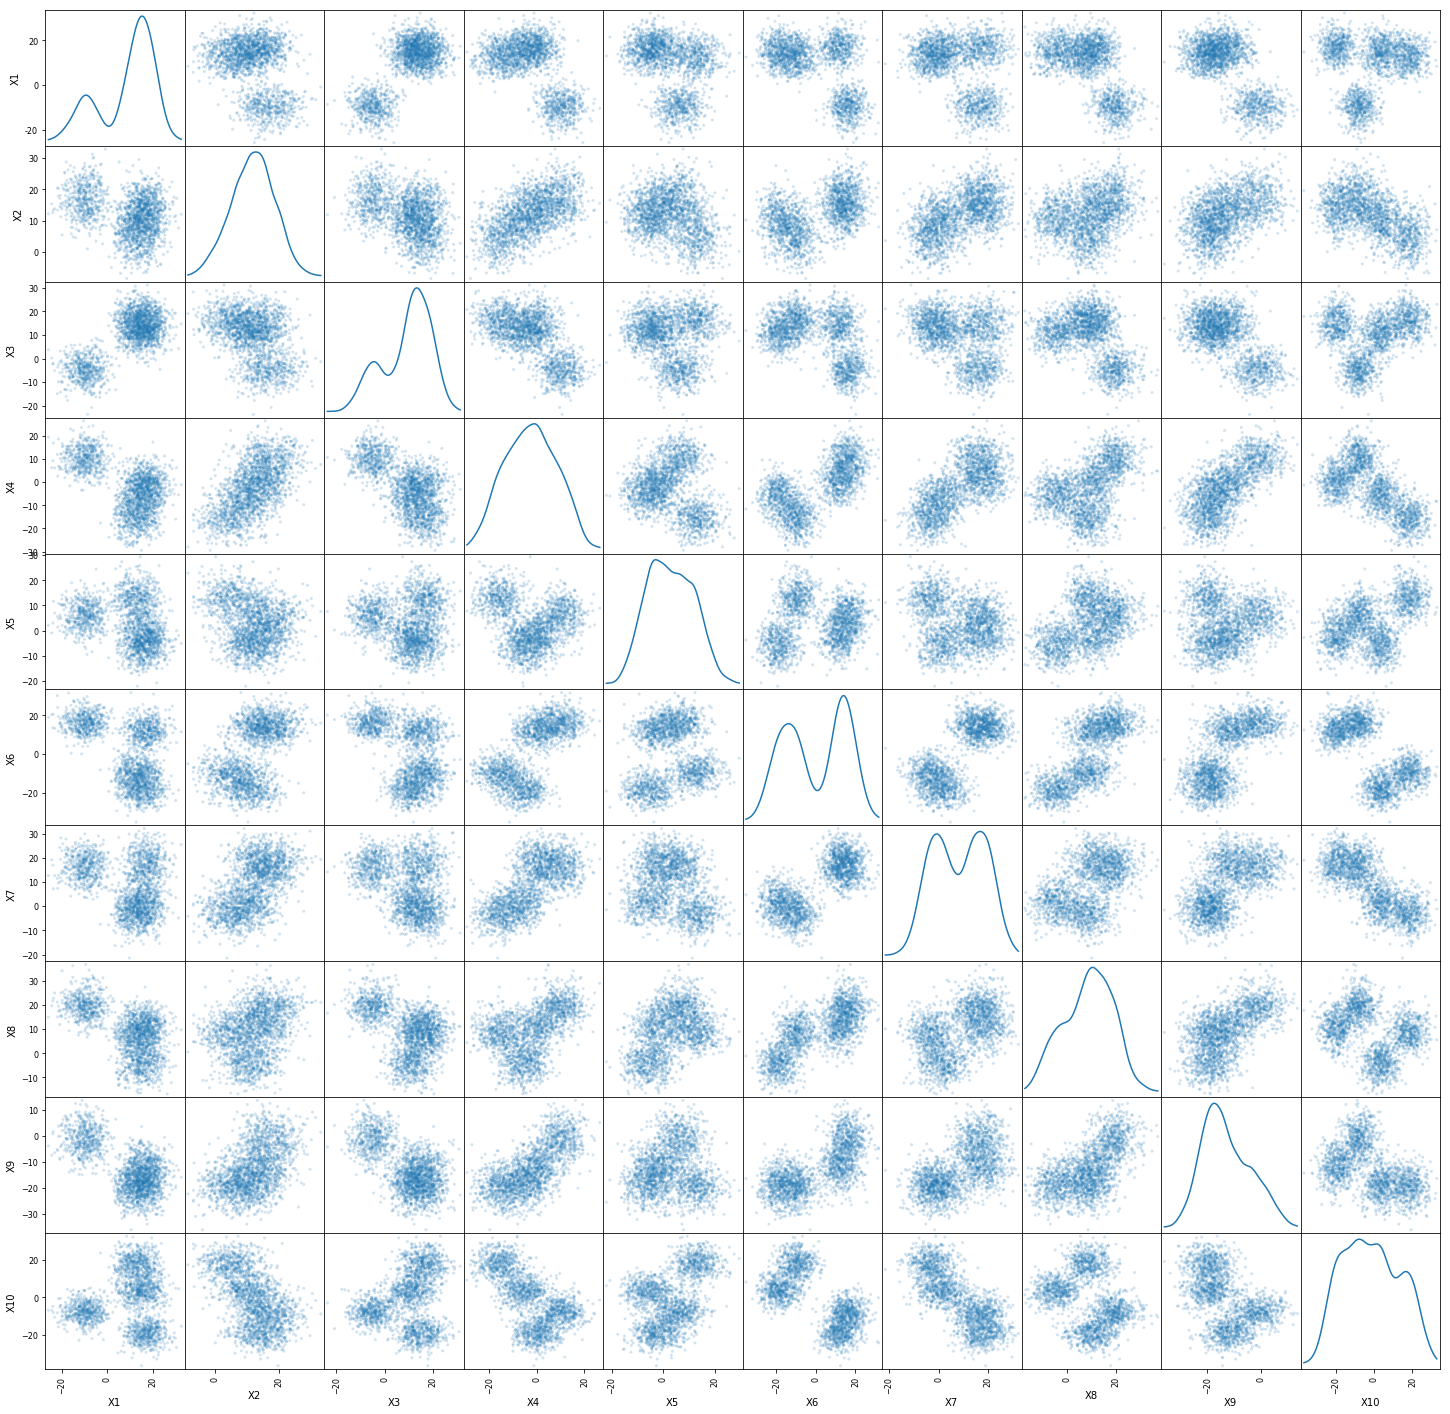

In [35]:
#Scatter Plot: At diagonal elements we can confirm the data distribution
from pandas.plotting import scatter_matrix
scatter_matrix(Data_Viz, alpha=0.2, figsize=(25, 25), diagonal='kde')

From above scatter plot we can confirm the individual distribution of variable and it's plot with other variables.

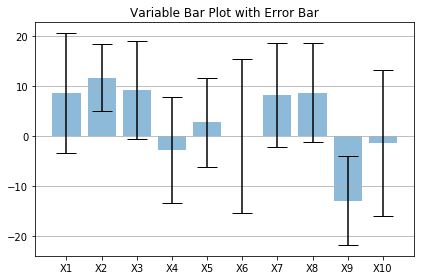

In [36]:
#Creating Error Bar Plot
Col_List=Data_Viz.columns
x_pos = np.arange(len(Col_List))

Mean_Values=[]
Standard_Deviation=[]
for i in Col_List:
        Mean_Values.append(np.mean(df2[i]))
        Standard_Deviation.append(np.std(df2[i]))
    

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, Mean_Values,
       yerr=Standard_Deviation,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)

ax.set_xticks(x_pos)
ax.set_xticklabels(Col_List)
ax.set_title('Variable Bar Plot with Error Bar')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

1. An error bar is a line through a point on a graph, parallel to one of the axes, which represents the uncertainty or variation of the corresponding coordinate of the point, in most cases error bar represents standard deviations.
2. This graph also represents how accuretly mean value represents the data. Smaller the Standard Deviation bar means more reliable mean value.
3. When standard deviation errors bars overlap quite a bit, it's a clue that the difference is not statistically significant, in slight overlap it might be not statistically significant while in case of No Overlap it may be statistically significant but need to prove by tests.


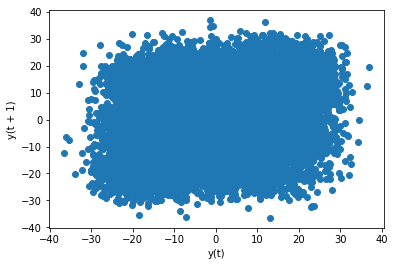

In [37]:
from pandas.plotting import lag_plot
lag_plot(Data_Viz)

Lag plots are used to check if a data set is random. Random data should not exhibit any structure in the lag plot and this can be seen from above plot.

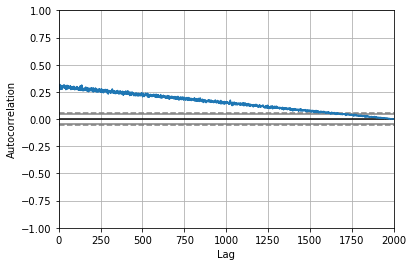

In [38]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(Data_Viz)

Text(0.5, 1.0, 'Variable Cumulative Sum ')

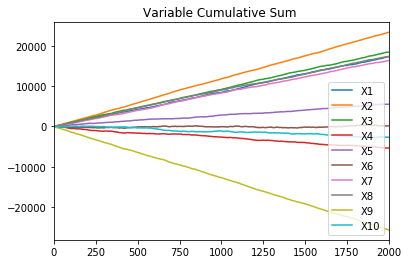

In [39]:
d1 = Data_Viz.cumsum()
d1.plot(legend=True)
plt.title('Variable Cumulative Sum ')

This plot gives cumulative sum of variables in Dataset.

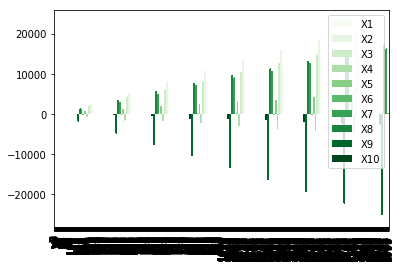

In [40]:
d1.plot.bar(colormap='Greens')

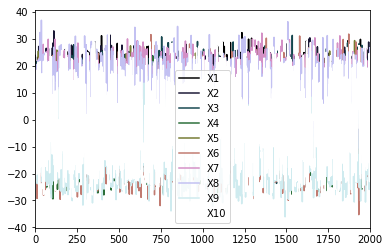

In [41]:
from matplotlib import cm
Data_Viz.plot(colormap=cm.cubehelix)

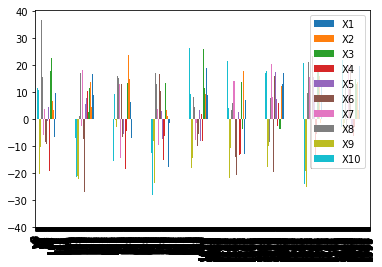

In [42]:
Data_Viz.plot.bar();

Above graphs shows distributions of data points for each variable.

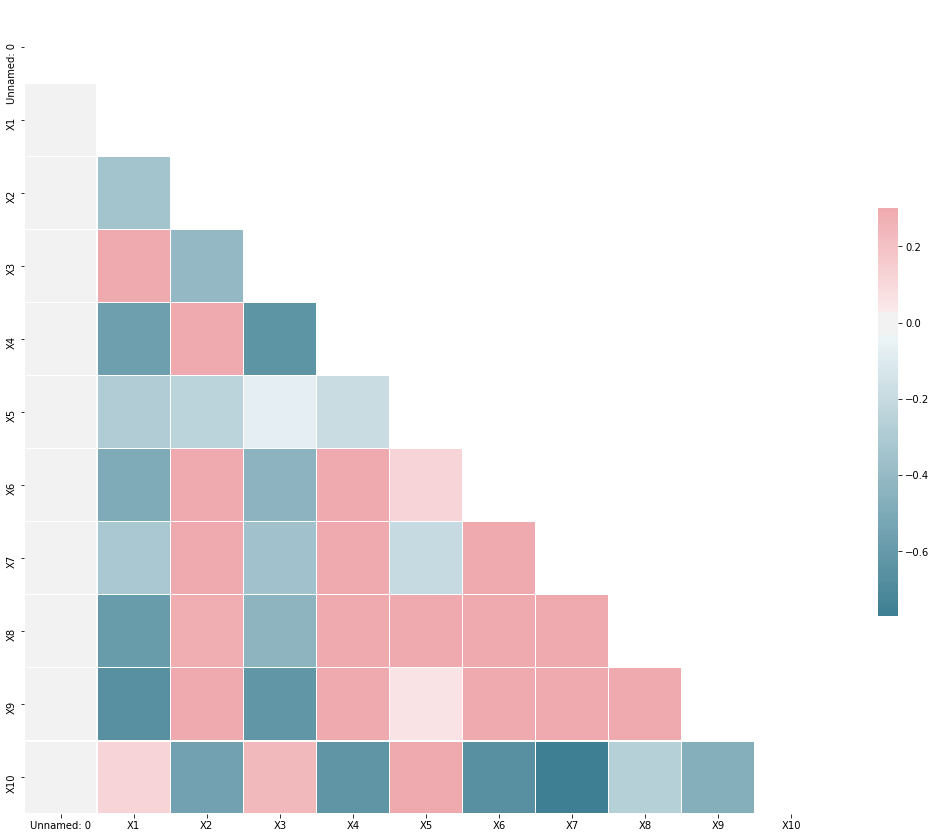

In [43]:
#Correlation plot for Dataframe.
corr = df2.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


Above graph indicates the correlation plot of correlation matrix. To understand the direction and affect, index is provided on right side of graph.

In [44]:
corr

Unnamed: 0        X1        X2        X3        X4        X5  \
Unnamed: 0    1.000000  0.003482 -0.011494 -0.014302  0.014285 -0.002685   
X1            0.003482  1.000000 -0.336911  0.743385 -0.567528 -0.280974   
X2           -0.011494 -0.336911  1.000000 -0.405233  0.588871 -0.244078   
X3           -0.014302  0.743385 -0.405233  1.000000 -0.632856 -0.068948   
X4            0.014285 -0.567528  0.588871 -0.632856  1.000000 -0.192661   
X5           -0.002685 -0.280974 -0.244078 -0.068948 -0.192661  1.000000   
X6            0.019011 -0.494914  0.473964 -0.440832  0.641886  0.120699   
X7           -0.004611 -0.316441  0.540085 -0.351975  0.678063 -0.202808   
X8           -0.026656 -0.581710  0.281949 -0.431649  0.430786  0.411262   
X9           -0.003715 -0.659637  0.467640 -0.622713  0.684994  0.063262   
X10          -0.013331  0.120390 -0.544131  0.235727 -0.630633  0.432553   

                  X6        X7        X8        X9       X10  
Unnamed: 0  0.019011 -0.004611 -0.026656 -0.003715 -0.013331  
X1         -0.494914 -0.316441 -0.581710 -0.659637  0.120390  
X2          0.473964  0.540085  0.281949  0.467640 -0.544131  
X3         -0.440832 -0.351975 -0.431649 -0.622713  0.235727  
X4          0.641886  0.678063  0.430786  0.684994 -0.630633  
X5          0.120699 -0.202808  0.411262  0.063262  0.432553  
X6          1.000000  0.739191  0.727217  0.682713 -0.655046  
X7          0.739191  1.000000  0.469389  0.581720 -0.769429  
X8          0.727217  0.469389  1.000000  0.597339 -0.270553  
X9          0.682713  0.581720  0.597339  1.000000 -0.461024  
X10        -0.655046 -0.769429 -0.270553 -0.461024  1.000000

Text(0.5, 1.0, 'X1_Distribution')

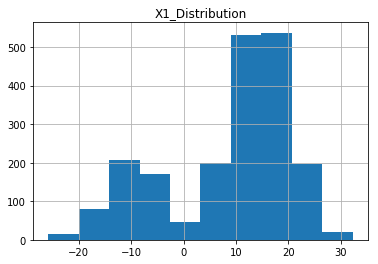

In [45]:
#Histograms for all variables from Dataframe 2
df2['X1'].hist()
plt.title('X1_Distribution')

Text(0.5, 1.0, 'X2_Distribution')

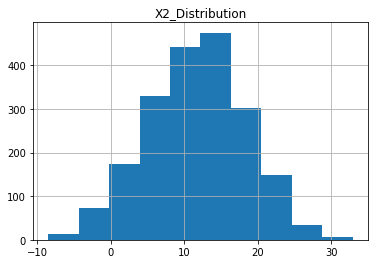

In [46]:
df2['X2'].hist()
plt.title('X2_Distribution')

Text(0.5, 1.0, 'X3_Distribution')

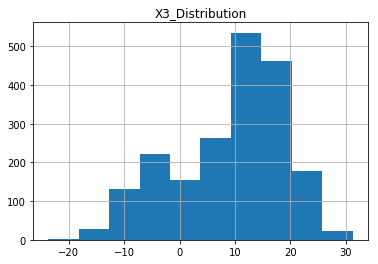

In [47]:
df2['X3'].hist()
plt.title('X3_Distribution')

Text(0.5, 1.0, 'X4_Distribution')

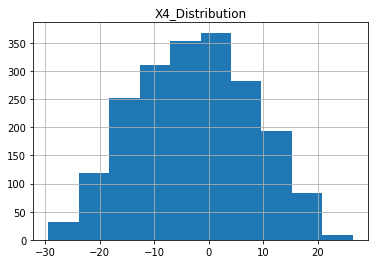

In [48]:
df2['X4'].hist()
plt.title('X4_Distribution')

Text(0.5, 1.0, 'X5_Distribution')

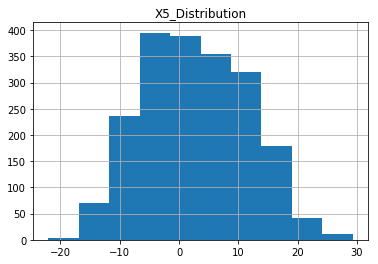

In [49]:
df2['X5'].hist()
plt.title('X5_Distribution')

Text(0.5, 1.0, 'X6_Distribution')

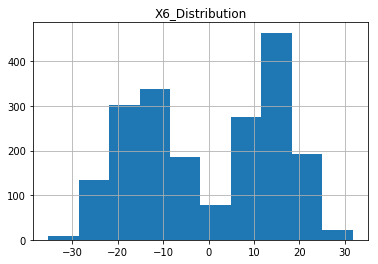

In [50]:
df2['X6'].hist()
plt.title('X6_Distribution')

Text(0.5, 1.0, 'X7_Distribution')

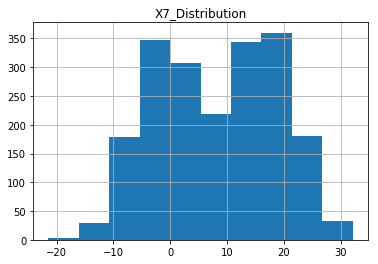

In [51]:
df2['X7'].hist()
plt.title('X7_Distribution')

Text(0.5, 1.0, 'X8_Distribution')

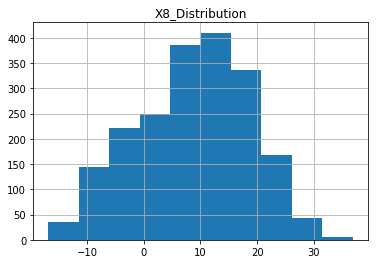

In [52]:
df2['X8'].hist()
plt.title('X8_Distribution')

Text(0.5, 1.0, 'X9_Distribution')

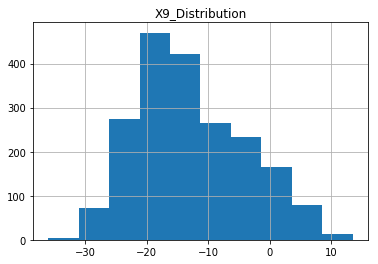

In [53]:
df2['X9'].hist()
plt.title('X9_Distribution')

Text(0.5, 1.0, 'X10_Distribution')

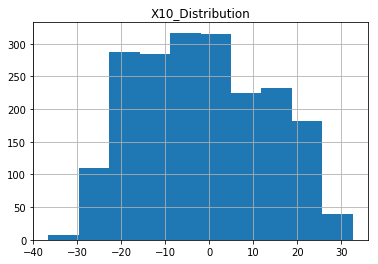

In [54]:
df2['X10'].hist()
plt.title('X10_Distribution')

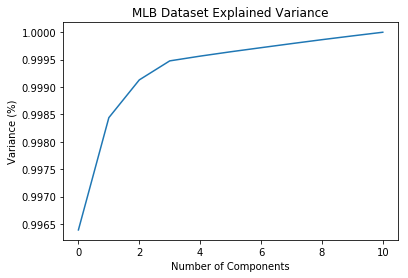

In [55]:
from sklearn.decomposition import PCA
pca = PCA().fit(df2)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('MLB Dataset Explained Variance')
plt.show()

Every new added dataset should add some variance into the structure. From above plot we can identify only about 4 variables are adding variance then line is becoming alsmot linear.

Now plotting Violin Plot for all variables.

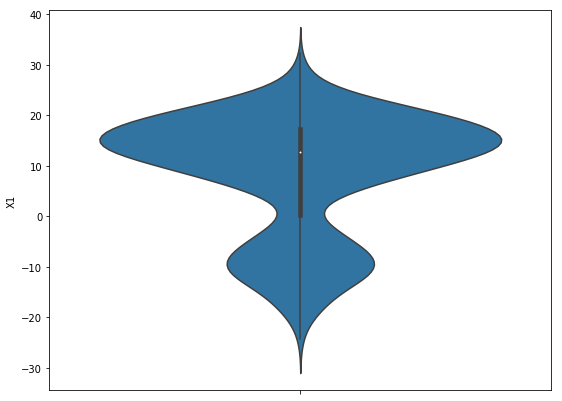

In [56]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize =(9, 7)) 
sns.violinplot(ax = ax,  y = df2["X1"] ) 

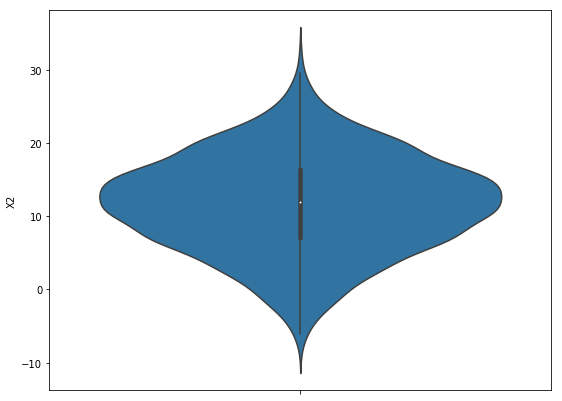

In [57]:
fig, ax = pyplot.subplots(figsize =(9, 7)) 
sns.violinplot(ax = ax,  y = df2["X2"] ) 

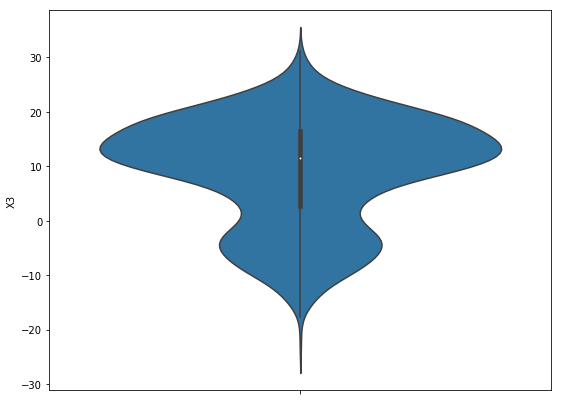

In [58]:
fig, ax = pyplot.subplots(figsize =(9, 7)) 
sns.violinplot(ax = ax,  y = df2["X3"] ) 

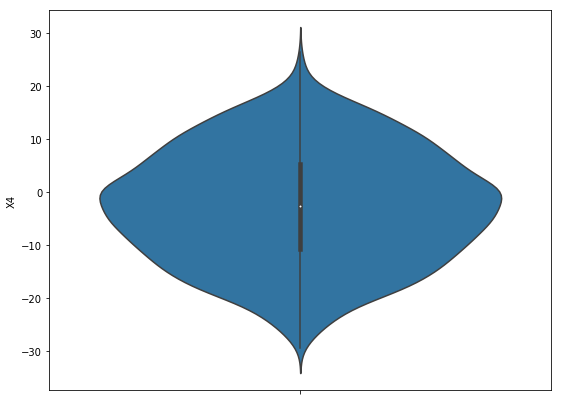

In [59]:
fig, ax = pyplot.subplots(figsize =(9, 7)) 
sns.violinplot(ax = ax,  y = df2["X4"] ) 

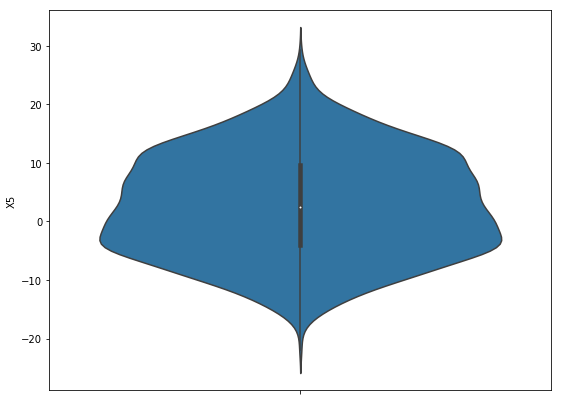

In [60]:
fig, ax = pyplot.subplots(figsize =(9, 7)) 
sns.violinplot(ax = ax,  y = df2["X5"] ) 

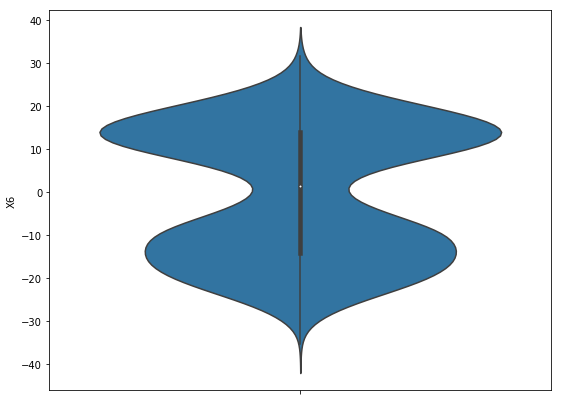

In [61]:
fig, ax = pyplot.subplots(figsize =(9, 7)) 
sns.violinplot(ax = ax,  y = df2["X6"] ) 

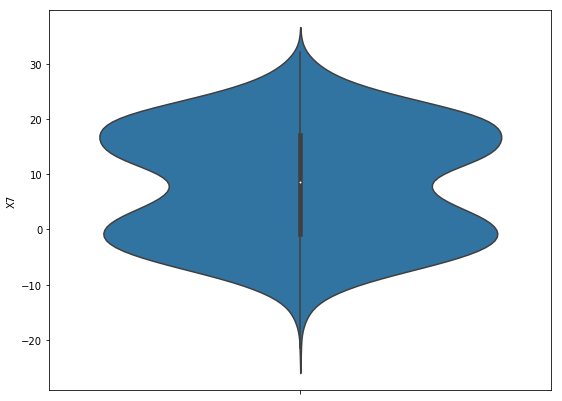

In [62]:
fig, ax = pyplot.subplots(figsize =(9, 7)) 
sns.violinplot(ax = ax,  y = df2["X7"] ) 

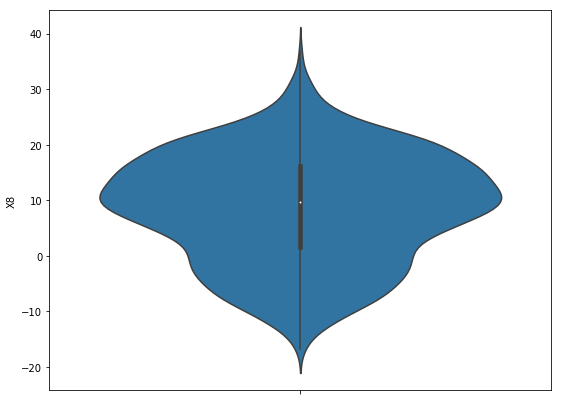

In [63]:
fig, ax = pyplot.subplots(figsize =(9, 7)) 
sns.violinplot(ax = ax,  y = df2["X8"] ) 

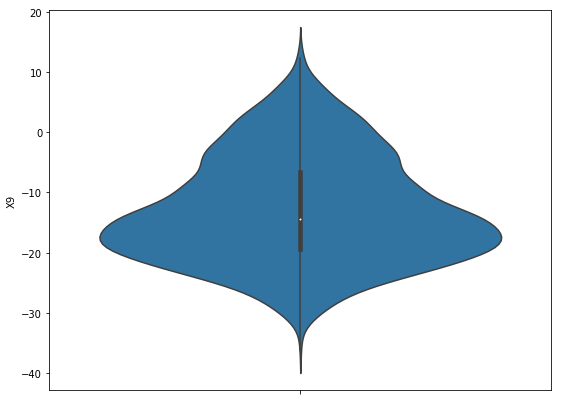

In [64]:
fig, ax = pyplot.subplots(figsize =(9, 7)) 
sns.violinplot(ax = ax,  y = df2["X9"] ) 

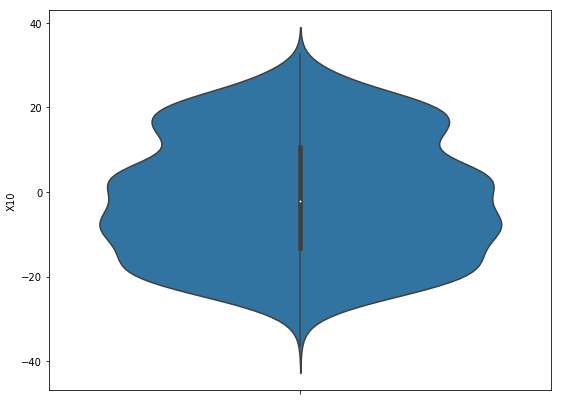

In [65]:
fig, ax = pyplot.subplots(figsize =(9, 7)) 
sns.violinplot(ax = ax,  y = df2["X10"] ) 

By using above violine plot, we can confirm the distribution for Variables X1, X3, X6 and X7 is different compared to others. These variables have bimodal distribution while other variables are normally distributed.Hence storing these variables into first dataframe, and remeaning into second dataframe on the basis of distribution.

In [66]:
Data1=df2[['X1', 'X3', 'X6','X7']]

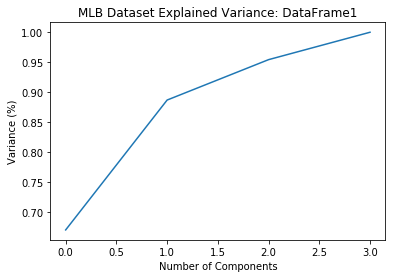

In [67]:
from sklearn.decomposition import PCA
pca = PCA().fit(Data1)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('MLB Dataset Explained Variance: DataFrame1')
plt.show()

In [68]:
Data2=df2[['X2','X4','X5','X8','X9','X10']]

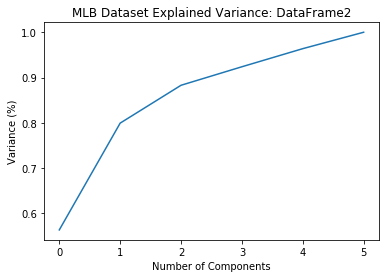

In [70]:
from sklearn.decomposition import PCA
pca = PCA().fit(Data2)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('MLB Dataset Explained Variance: DataFrame2')
plt.show()

from above variance plot we can confirm all the variables in both dataframe are adding variance into their respective datasets. Thus we can confirm they belong to their respective dataframes.

so I believe there are 2 dataframes with features X1, X3, X6, X7 belonging to first and X2, X4, X5, X8, X9, X10 belonging to second.

3)	Stack Overflow provides a tool at https://data.stackexchange.com/stackoverflow/query/new that allows SQL queries to be run against their data. After reviewing the database schema provided on their site, please answer the questions below by providing both your answer and the query used to derive it.

a)    How many posts were created in 2017?

Query: select count(*) from Posts where Year(CreationDate)=2017                                               
Answer: 5063484

b)What is the distribution of views for users?

Query: select Views, Count(id) as CountUsers from Users group by Views order by CountUsers desc

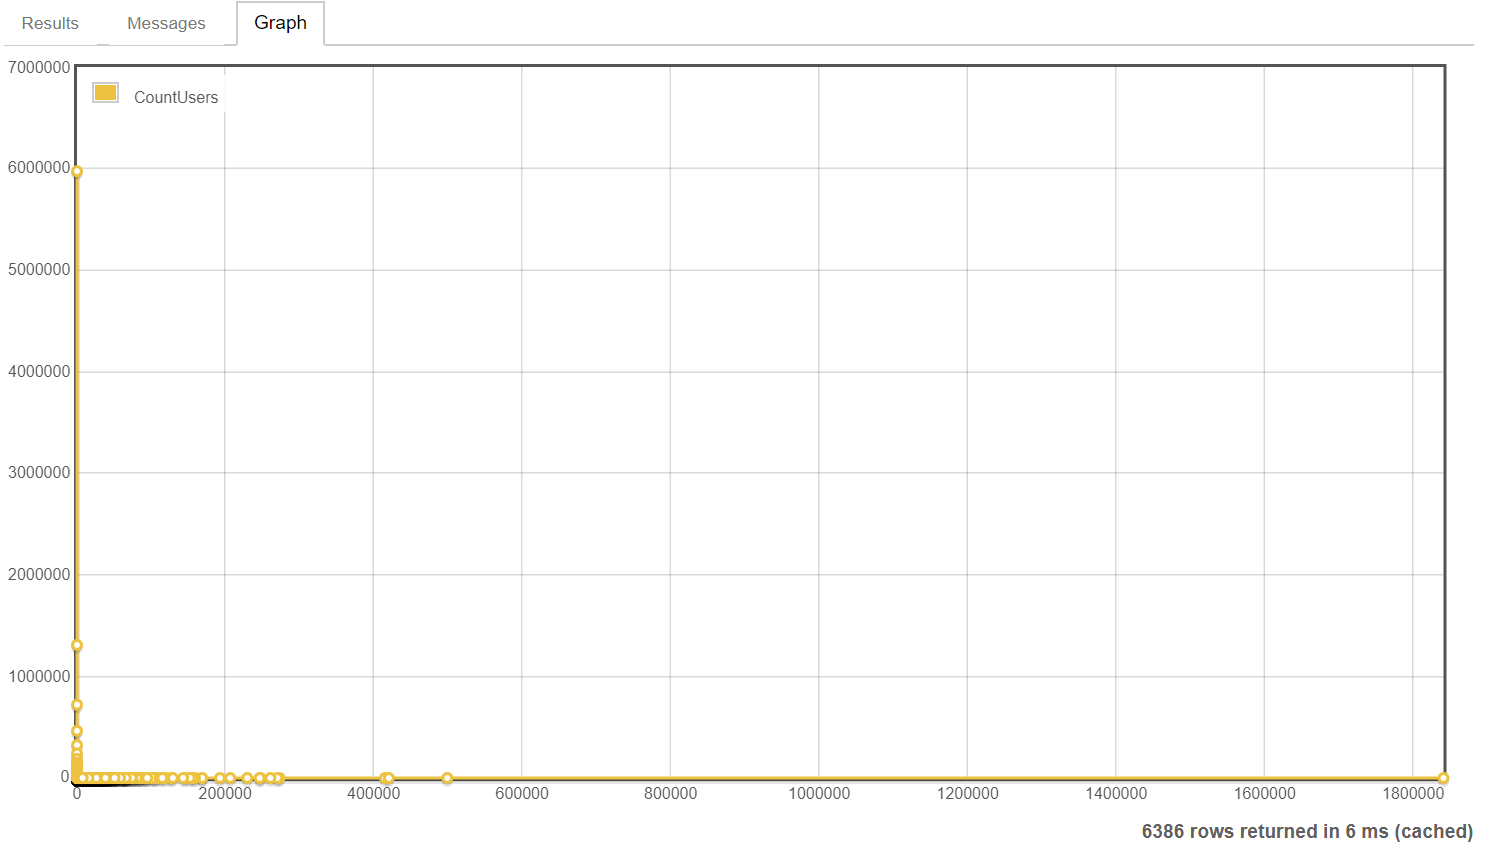

In [72]:
from IPython.display import Image
Image(filename='D:/MLB/Views_Distribution.PNG')

I have exported the output of above query. X axis on plot is Views Count while Y axis is Users Count. Plot is taken from Stack Overflow platform however below is the output of query in dataframe.

In [73]:
View_Distribution=pd.read_csv('D:/MLB/QueryResults_2.csv')
View_Distribution.head()

Views  CountUsers
0      0     5974180
1      1     1310026
2      2      721593
3      3      464470
4      4      324476

c)	What are the top 10 tags associated with posts created in 2017?

Query: select TOP 11 Tags, count(*)as Value from Posts where Year(CreationDate)=2017 Group By Tags order by Value desc

Answer: javascript, python, java, android, html css, javascript jquery, php, r, c#, mysql

Note: If we are taking only top 10 rows of above query it is giving one null entry, i.e. Post not associated with any tags. Thus to get 10 not null entries, considering top 11 rows.

In [75]:
#Below is the output of query in dataframe
Top_10_Tags=pd.read_csv('D:/MLB/QueryResults_3.csv')
Top_10_Tags

Tags    Value
0                    NaN  2930707
1           <javascript>    12246
2               <python>    11862
3                 <java>     9365
4              <android>     9237
5            <html><css>     9123
6   <javascript><jquery>     8957
7                  <php>     8464
8                    <r>     7823
9                   <c#>     6521
10               <mysql>     6091

d) *BONUS* For the questions created in 2017, what was the average time (in seconds) between when the question was created and when the accepted answer was provided?

Query: select AVG(cast(DATEDIFF(s,CreationDate, ApprovalDate) as float))As AverageTime
from TagSynonyms
where year(CreationDate) = 2017

Answer: 11001327.423868313 Seconds

Submitted by Sudesh V Khillare